In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mergui
City not found. Skipping...
Processing Record 2 of Set 1 | mayo
Processing Record 3 of Set 1 | dinsor
City not found. Skipping...
Processing Record 4 of Set 1 | aksu
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | lerwick
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | lazaro cardenas
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | neepawa
Processing Record 18 of Set 1 | buala
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | ushuaia
P

Processing Record 39 of Set 4 | mahina
Processing Record 40 of Set 4 | nguru
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | sweetwater
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | artyk
City not found. Skipping...
Processing Record 47 of Set 4 | paredon
Processing Record 48 of Set 4 | esmeralda
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | tessalit
Processing Record 1 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 5 | laguna
Processing Record 3 of Set 5 | kutum
Processing Record 4 of Set 5 | barentu
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | rengasdengklok
Processing Record 7 of Set 5 | mataura
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | lekoni
Processing Record 10 of Set 5 | solnechnyy
Processing Record 11 of Set 5 | dalbandin
Processing

Processing Record 25 of Set 8 | tsabong
Processing Record 26 of Set 8 | placido de castro
Processing Record 27 of Set 8 | bosaso
Processing Record 28 of Set 8 | katha
City not found. Skipping...
Processing Record 29 of Set 8 | carbonia
Processing Record 30 of Set 8 | neustrelitz
Processing Record 31 of Set 8 | chokurdakh
Processing Record 32 of Set 8 | gorakhpur
Processing Record 33 of Set 8 | jadu
Processing Record 34 of Set 8 | lata
Processing Record 35 of Set 8 | boguchar
Processing Record 36 of Set 8 | rungata
City not found. Skipping...
Processing Record 37 of Set 8 | lebu
Processing Record 38 of Set 8 | pangody
Processing Record 39 of Set 8 | barroualie
City not found. Skipping...
Processing Record 40 of Set 8 | souillac
Processing Record 41 of Set 8 | norman wells
Processing Record 42 of Set 8 | kimbe
Processing Record 43 of Set 8 | nouadhibou
Processing Record 44 of Set 8 | odweyne
Processing Record 45 of Set 8 | leningradskiy
Processing Record 46 of Set 8 | acapulco
Processing

Processing Record 10 of Set 12 | panalingaan
Processing Record 11 of Set 12 | vilhena
Processing Record 12 of Set 12 | port hedland
Processing Record 13 of Set 12 | erbaa
Processing Record 14 of Set 12 | banes
Processing Record 15 of Set 12 | marsabit
Processing Record 16 of Set 12 | fernie
Processing Record 17 of Set 12 | grizanon
Processing Record 18 of Set 12 | mabaruma
Processing Record 19 of Set 12 | pangnirtung
Processing Record 20 of Set 12 | anchorage
Processing Record 21 of Set 12 | progreso
Processing Record 22 of Set 12 | grindavik
Processing Record 23 of Set 12 | quibdo
Processing Record 24 of Set 12 | bensonville
Processing Record 25 of Set 12 | pavlodar
Processing Record 26 of Set 12 | the pas
Processing Record 27 of Set 12 | rawah
Processing Record 28 of Set 12 | naze
Processing Record 29 of Set 12 | inuvik
Processing Record 30 of Set 12 | lososina
Processing Record 31 of Set 12 | yar-sale
Processing Record 32 of Set 12 | clinton
Processing Record 33 of Set 12 | algiers


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mayo,38.8876,-76.5119,39.42,56,40,7.00,US,2022-01-31 19:48:53
1,Aksu,41.1231,80.2644,27.00,44,10,3.69,CN,2022-01-31 19:48:53
2,Atuona,-9.8000,-139.0333,78.17,79,7,18.72,PF,2022-01-31 19:48:54
3,Lerwick,60.1545,-1.1494,41.00,80,100,15.23,GB,2022-01-31 19:48:54
4,Cherskiy,68.7500,161.3000,-20.31,98,100,2.86,RU,2022-01-31 19:48:54
5,Yellowknife,62.4560,-114.3525,-9.71,82,20,12.66,CA,2022-01-31 19:47:12
6,Port Alfred,-33.5906,26.8910,75.78,93,100,10.36,ZA,2022-01-31 19:48:55
7,Lazaro Cardenas,17.9583,-102.2000,81.73,56,0,9.75,MX,2022-01-31 19:48:55
8,Vaini,-21.2000,-175.2000,79.84,75,100,14.56,TO,2022-01-31 19:48:55
9,Hithadhoo,-0.6000,73.0833,82.54,72,35,8.95,MV,2022-01-31 19:48:56


In [10]:
col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[col_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayo,US,2022-01-31 19:48:53,38.8876,-76.5119,39.42,56,40,7.00
1,Aksu,CN,2022-01-31 19:48:53,41.1231,80.2644,27.00,44,10,3.69
2,Atuona,PF,2022-01-31 19:48:54,-9.8000,-139.0333,78.17,79,7,18.72
3,Lerwick,GB,2022-01-31 19:48:54,60.1545,-1.1494,41.00,80,100,15.23
4,Cherskiy,RU,2022-01-31 19:48:54,68.7500,161.3000,-20.31,98,100,2.86
5,Yellowknife,CA,2022-01-31 19:47:12,62.4560,-114.3525,-9.71,82,20,12.66
6,Port Alfred,ZA,2022-01-31 19:48:55,-33.5906,26.8910,75.78,93,100,10.36
7,Lazaro Cardenas,MX,2022-01-31 19:48:55,17.9583,-102.2000,81.73,56,0,9.75
8,Vaini,TO,2022-01-31 19:48:55,-21.2000,-175.2000,79.84,75,100,14.56
9,Hithadhoo,MV,2022-01-31 19:48:56,-0.6000,73.0833,82.54,72,35,8.95


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

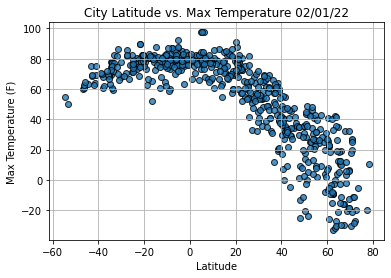

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

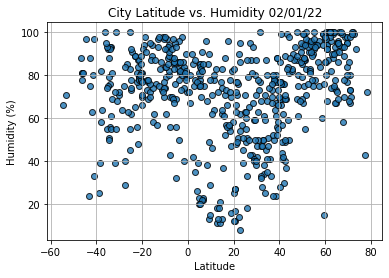

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

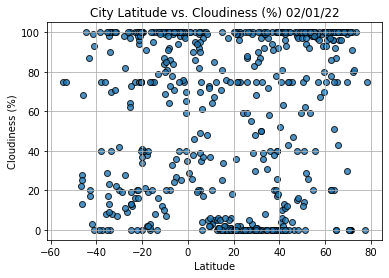

In [16]:
# Build the scatter plot for latitude vs. max cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

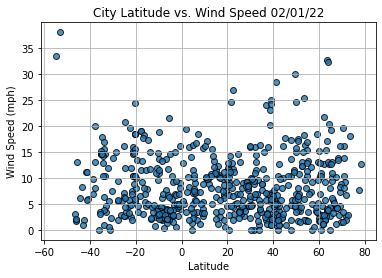

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()